In [1]:
import sys
import os.path
import pylab as plt
from zedstat.zedstat import zedstat
import pandas as pd

In [2]:
#
# order is order of spline used for smoothing
# alpha is significance level
# prevalence is prevalence of positive class
# 
zt=zedstat(df=pd.read_csv('examples_data/roc2.csv'),
           order=3, 
           total_samples=100000,
           positive_samples=1000,
           alpha=0.1,
           prevalence=.01)

In [3]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

In [4]:
zt.df_lim['U']

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.186057,0.990000,0.990000,74.337072,1.000000,1.470513
0.001,0.094300,0.487843,0.989953,0.990925,94.300275,0.906606,0.380974
0.002,0.157680,0.443319,0.989597,0.991547,78.839861,0.844008,0.349475
0.003,0.195601,0.397078,0.988986,0.991916,65.200424,0.806819,0.332624
0.004,0.233211,0.370641,0.988372,0.992284,58.302850,0.769868,0.315774
...,...,...,...,...,...,...,...
0.996,1.000000,0.010040,0.013960,1.000000,1.004016,0.000000,0.001358
0.997,1.000000,0.010030,0.012970,1.000000,1.003009,0.000000,0.001356
0.998,1.000000,0.010020,0.011980,1.000000,1.002004,0.000000,0.001355


In [5]:
zt.df_lim['L']

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.168965,0.990000,0.990000,50.791700,1.000000,1.470513
0.001,0.066050,0.400180,0.989670,0.990645,66.049579,0.934885,0.380974
0.002,0.121621,0.380515,0.989236,0.991188,60.810285,0.880140,0.349475
0.003,0.156002,0.344374,0.988590,0.991522,52.000743,0.846537,0.332624
0.004,0.190695,0.325033,0.987947,0.991859,47.673826,0.812555,0.315774
...,...,...,...,...,...,...,...
0.996,1.000000,0.010040,0.013960,1.000000,1.004016,0.000000,0.001358
0.997,1.000000,0.010030,0.012970,1.000000,1.003009,0.000000,0.001356
0.998,1.000000,0.010020,0.011980,1.000000,1.002004,0.000000,0.001355


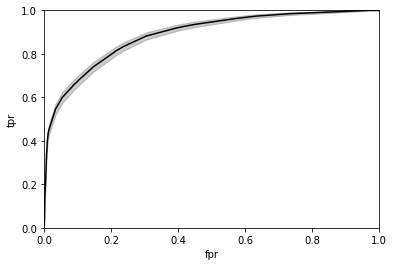

In [11]:
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

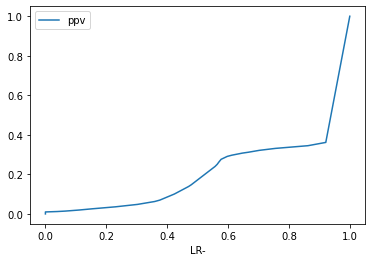

In [12]:
ax=zt.get().plot(x='LR-',y='ppv')

In [13]:
# compute auc with confidence bounds
zt.auc(alpha=.001)

(0.8875903790087464, 0.9127429179592511, 0.8624378400582415)

In [14]:
# required sample size
zt.samplesize(delta_auc=.1)

26.99420757849582

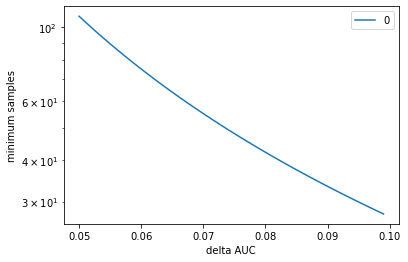

In [15]:
import numpy as np
pd.DataFrame(np.array([zt.samplesize(delta_auc=a) 
                       for a in np.arange(.05,.1,.001)]),
             np.arange(.05,.1,.001)).plot(logy=True)
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('minimum samples');

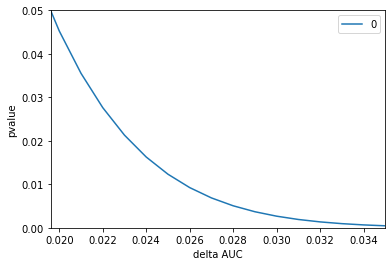

In [16]:
pd.DataFrame([zt.pvalue(delta_auc=a) for a in np.arange(0.001,.1,.001)],
             np.arange(0.001,.1,.001)).plot()
plt.gca().set_ylim(0,0.05)   
plt.gca().set_xlim(0.0196,0.035)   
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('pvalue');

In [17]:
zt.operating_zone(LRminus=.65)
rf0,txt0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=10)
rf1,txt1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=10)
display(zt._operating_zone)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))

,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold
high precision,0.008,0.358115,0.307628,0.985499,0.993506,43.99784,0.647145,0.234186
high sensitivity,0.064,0.616202,0.091559,0.932393,0.995877,10.00695,0.409831,0.031257


high precision operation:
 For every 10 positive instances
 we raise 26 flags,
 out of which 5 are true positives
 21 are false alarms
 5 cases are missed


high recall operation:
 For every 10 positive instances
 we raise 44 flags,
 out of which 6 are true positives
 38 are false alarms
 4 cases are missed


In [18]:
from zedstat.textable import tablewithbounds
xf=tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))#.to_csv('table.csv')
xf.loc[zt._operating_zone.fpr.values]

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.008,$0.358 \pm 0.049$,$0.307 \pm 0.027$,$0.985 \pm 0.000$,$0.993 \pm 0.000$,$43.99 \pm 5.469$,$0.647 \pm 0.050$,0.234186
0.064,$0.616 \pm 0.050$,$0.091 \pm 0.009$,$0.932 \pm 9.720$,$0.995 \pm 0.000$,$10.00 \pm 1.169$,$0.409 \pm 0.054$,0.031257


In [19]:
from zedstat.textable import textable
textable(xf,tabname='tmp.tex',FORMAT='%1.2f',INDEX=True,LNTERM='\\\\\\hline\n')
!cat tmp.tex
         

\begin{tabular}{L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}}\hline
fpr&tpr&ppv&acc& npv &LR+&LR-& threshold \\\hline
0.00& $0.0  \pm  0.0$ & $1.0  \pm  0.840$ & $0.99  \pm  0.0$ & $0.99  \pm  0.0$ & $59.73  \pm  18.50$ & $1.0  \pm  0.0$ &1.47\\\hline
0.00& $0.080  \pm  0.028$ & $0.361  \pm  0.017$ & $0.989  \pm  -0.00$ & $0.990  \pm  0.000$ & $56.15  \pm  4.235$ & $0.921  \pm  0.027$ &0.38\\\hline
0.00& $0.139  \pm  0.036$ & $0.345  \pm  0.001$ & $0.988  \pm  -0.00$ & $0.991  \pm  0.000$ & $52.20  \pm  0.410$ & $0.862  \pm  0.035$ &0.35\\\hline
0.00& $0.175  \pm  0.039$ & $0.340  \pm  0.026$ & $0.988  \pm  -0.00$ & $0.991  \pm  0.000$ & $51.17  \pm  5.774$ & $0.826  \pm  0.039$ &0.33\\\hline
0.00& $0.211  \pm  0.042$ & $0.336  \pm  0.036$ & $0.987  \pm  0.000$ & $0.992  \pm  0.000$ & $50.14  \pm  7.786$ & $0.791  \pm  0.042$ &0.32\\\hline
0.01& $0.248  \pm  0.044$ & $0.331  \pm  0.040$ & $0.987  \pm  0.000$ & $0.992  \pm  0.000$ & $49.11  \pm  8.481$ & $0.755  \pm  0.045$ &

In [20]:
xf

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,$0.0 \pm 0.0$,$1.0 \pm 0.840$,$0.99 \pm 0.0$,$0.99 \pm 0.0$,$59.73 \pm 18.50$,$1.0 \pm 0.0$,1.470513
0.001,$0.080 \pm 0.028$,$0.361 \pm 0.017$,$0.989 \pm -0.00$,$0.990 \pm 0.000$,$56.15 \pm 4.235$,$0.921 \pm 0.027$,0.380974
0.002,$0.139 \pm 0.036$,$0.345 \pm 0.001$,$0.988 \pm -0.00$,$0.991 \pm 0.000$,$52.20 \pm 0.410$,$0.862 \pm 0.035$,0.349475
0.003,$0.175 \pm 0.039$,$0.340 \pm 0.026$,$0.988 \pm -0.00$,$0.991 \pm 0.000$,$51.17 \pm 5.774$,$0.826 \pm 0.039$,0.332624
0.004,$0.211 \pm 0.042$,$0.336 \pm 0.036$,$0.987 \pm 0.000$,$0.992 \pm 0.000$,$50.14 \pm 7.786$,$0.791 \pm 0.042$,0.315774
...,...,...,...,...,...,...,...
0.996,$1.0 \pm 0.0$,$0.001 \pm -0.00$,$0.013 \pm -7.88$,$1.000 \pm 0.000$,$1.004 \pm 2.713$,$0.0 \pm 0.0$,0.001358
0.997,$1.0 \pm 0.0$,$0.000 \pm -0.00$,$0.012 \pm -5.91$,$1.000 \pm 0.000$,$1.003 \pm 2.337$,$0.0 \pm 0.0$,0.001356
0.998,$1.0 \pm 0.0$,$0.000 \pm -0.00$,$0.011 \pm -3.94$,$1.000 \pm 0.000$,$1.002 \pm 1.759$,$0.0 \pm 0.0$,0.001355


In [24]:
#pd.set_option('display.max_rows', 500)
zt.usample(zt.df_lim['U'],precision=2)

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.00,0.000000,0.194091,0.990000,0.990000,87.940809,1.000000,1.470513
0.01,0.459801,0.317148,0.984698,0.994519,45.980126,0.545655,0.189934
0.02,0.531210,0.211536,0.975512,0.995191,26.560514,0.478357,0.086402
0.03,0.578558,0.163040,0.966086,0.995631,19.285253,0.434477,0.056487
0.04,0.613546,0.134151,0.956535,0.995950,15.338649,0.402556,0.042618
0.05,0.639507,0.114412,0.946895,0.996182,12.790133,0.379467,0.036498
0.06,0.660302,0.100041,0.937203,0.996363,11.005027,0.361381,0.032392
0.07,0.676541,0.088942,0.927465,0.996499,9.664868,0.347806,0.029554
0.08,0.692716,0.080429,0.917727,0.996638,8.658952,0.334004,0.026717


In [29]:
pd.set_option('display.max_rows', 500)
zt.df_lim['U']#-zt.df_lim['L']

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.194091,0.990000,0.990000,87.940809,1.000000,1.470513
0.001,0.108433,0.522737,0.990094,0.991066,108.432661,0.892460,0.380974
0.002,0.175718,0.470189,0.989777,0.991726,87.859139,0.825934,0.349475
0.003,0.215411,0.420387,0.989184,0.992114,71.803552,0.786950,0.332624
0.004,0.254480,0.391219,0.988585,0.992496,63.620009,0.748514,0.315774
...,...,...,...,...,...,...,...
0.996,1.000000,0.010040,0.013960,1.000000,1.004016,0.000000,0.001358
0.997,1.000000,0.010030,0.012970,1.000000,1.003009,0.000000,0.001356
0.998,1.000000,0.010020,0.011980,1.000000,1.002004,0.000000,0.001355


In [30]:
pd.set_option('display.max_rows', 500)
zt.df_lim['L']#-zt.df_lim['L']

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.159797,0.990000,0.990000,41.227870,1.000000,1.470513
0.001,0.051917,0.344011,0.989529,0.990505,51.917193,0.949032,0.380974
0.002,0.103582,0.343462,0.989056,0.991009,51.791006,0.898214,0.349475
0.003,0.136193,0.314393,0.988392,0.991324,45.397614,0.866406,0.332624
0.004,0.169427,0.299644,0.987734,0.991647,42.356667,0.833909,0.315774
...,...,...,...,...,...,...,...
0.996,1.000000,0.010040,0.013960,1.000000,1.004016,0.000000,0.001358
0.997,1.000000,0.010030,0.012970,1.000000,1.003009,0.000000,0.001356
0.998,1.000000,0.010020,0.011980,1.000000,1.002004,0.000000,0.001355


In [31]:
zt.get()-zt.df_lim['L']

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.840203,0.000000,0.000000,18.507469,0.000000,0.0
0.001,0.028258,0.017683,-0.000166,0.000276,4.235874,-0.027879,0.0
0.002,0.036068,0.001658,-0.000370,0.000354,0.410459,-0.035616,0.0
0.003,0.039609,0.026177,-0.000130,0.000393,5.774657,-0.039458,0.0
0.004,0.042527,0.036376,0.000104,0.000424,7.786410,-0.042610,0.0
...,...,...,...,...,...,...,...
0.996,0.000000,-0.008709,-0.000079,0.000753,0.000027,0.000000,0.0
0.997,0.000000,-0.009032,-0.000059,0.000781,0.000023,0.000000,0.0
0.998,0.000000,-0.009355,-0.000039,0.000809,0.000018,0.000000,0.0


In [28]:
pd.concat([zt.df_lim['U']-zt.get(),zt.get()-zt.df_lim['L']]).max(level=0)

/tmp/ipykernel_767967/652837840.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  pd.concat([zt.df_lim['U']-zt.get(),zt.get()-zt.df_lim['L']]).max(level=0)


,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.840203,0.000000,0.000000,28.205471,0.000000,0.0
0.001,0.028258,0.161043,0.000731,0.000285,52.279594,-0.027879,0.0
0.002,0.036068,0.125069,0.001091,0.000364,35.657674,-0.035616,0.0
0.003,0.039609,0.079817,0.000922,0.000397,20.631281,-0.039458,0.0
0.004,0.042527,0.055199,0.000747,0.000425,13.476933,-0.042610,0.0
...,...,...,...,...,...,...,...
0.996,0.000000,0.008709,0.000079,0.000753,0.000027,0.000000,0.0
0.997,0.000000,0.009032,0.000059,0.000781,0.000023,0.000000,0.0
0.998,0.000000,0.009355,0.000039,0.000809,0.000018,0.000000,0.0


In [32]:
zt.df_lim['U']-zt.df_lim['L']

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.034293,0.000000,0.000000,46.712939,0.000000,0.0
0.001,0.056515,0.178726,0.000565,0.000561,56.515468,-0.056572,0.0
0.002,0.072136,0.126727,0.000721,0.000718,36.068133,-0.072281,0.0
0.003,0.079218,0.105994,0.000792,0.000789,26.405938,-0.079456,0.0
0.004,0.085053,0.091575,0.000851,0.000849,21.263343,-0.085395,0.0
...,...,...,...,...,...,...,...
0.996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
0.997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
0.998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
